# **EDA HOMICIDIOS_LESIONES_ANALYSIS**

## 1. Introducción

En este Notebook se realizará el Análisis Exploratorio de los Datos de los conjuntos de datos limpios.

## 2. Importación de Librerías

In [181]:
import pandas as pd # Cargamos la libreria de "pandas" para la manipulación y el análisis de datos
import numpy as np # Cargamos la librería de "numpy" para realizar cálculos lógicos y matemáticos sobre cuadros y matrices en el caso que lo necesitemos
import matplotlib.pyplot as plt  #Cargarmos la libreria de "matplotlib" para graficar la relación que existen entre variables
import seaborn as sns  #Cargarmos la libreria de "seaborn" para graficar la relacion que existen entre las variables
import warnings
warnings.filterwarnings("ignore")

## 3. EDA - Analisis Exploratorio de Datos

### 3.1. Carga de DataSet

In [182]:
#Establecemos las rutas de los archivos
ruta_homicidios_clean_parquet = r'Dataset_Clean/homicidios_clean.parquet'
ruta_lesiones_clean_parquet = r'Dataset_Clean/lesiones_clean.parquet'


#Cargamos los archivos limpios luego de hacer el ETL
df_homicidios = pd.read_parquet(ruta_homicidios_clean_parquet) #Cargamos el archivo hechos_clean
df_lesiones = pd.read_parquet(ruta_lesiones_clean_parquet) #Cargamos el archivo victimas_clean

print(f'Se han leido exitosamente los siguientes archivos parquet')

Se han leido exitosamente los siguientes archivos parquet


### 3.2. Analisís Descriptivo de los DataSet

#### 3.2.1. Definición de las Funciones Descriptivas de los DataSet

In [183]:
#Definimos algunas funciones para que nos facilita la descripcion de las principales caracteristicas del DataFrame
def caracteristicas_df(df):
    """
    Describe de forma general la base de datos .

    Esta función simplemente muestra el tamaño, información general y
    la cantidad de datos nulos.

    Parametros
    ----------
    df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
    ----------
        - 'df.shape': Numero de filas y columnas
        - 'df.info': Muestra información general del DataFrame

    """
    print('*'*10 + '|'*10 + 'FORMA DE BASE DE DATOS' + '|'*10 + '*'*10, end = '\n'*2)
    print(f'Tiene {df.shape[0]} filas y {df.shape[1]} columnas o variables')
    print(end = '\n'*2)

    print('*'*10 + '|'*10 + 'INFORMACION GENERAL DE LA BASE DE DATOS' + '|'*10 + '*'*10, end = '\n'*2)
    print(df.info(), end = '\n'*2)

def valores_nulos_df(df):
    """
    Revisa presencia de valores nulos en un DataFrame.
    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    el porcentaje de valores no nulos y nulos, así como la ncantidad de valores nulos por columna.

    Parametros:
    ----------
    df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
    ----------
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre': Nombre de cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.

    """
    mi_df = {"nombre": [], "tipo_datos": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_df["nombre"].append(columna)
        mi_df["tipo_datos"].append(df[columna].apply(type).unique())
        mi_df["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_df["nulos"].append(df[columna].isnull().sum())

    df_nulos = pd.DataFrame(mi_df)

    return df_nulos

#### 3.2.2. Descripción de los DataSet

In [184]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "hechos_clean"
caracteristicas_df(df_homicidios)

**********||||||||||FORMA DE BASE DE DATOS||||||||||**********

Tiene 717 filas y 26 columnas o variables


**********||||||||||INFORMACION GENERAL DE LA BASE DE DATOS||||||||||**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  717 non-null    object 
 2   Anio                   717 non-null    int64  
 3   Mes                    717 non-null    int64  
 4   Día                    717 non-null    int64  
 5   Rol                    717 non-null    object 
 6   Victima                717 non-null    object 
 7   Sexo                   717 non-null    object 
 8   Edad                   717 non-null    int64  
 9   Gravedad               717 non-null    object 
 10  Rango_Etario           717 non-null    object 
 11  Sentencia              71

In [185]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "hechos_clean"
valores_nulos_df(df_homicidios)

,nombre,tipo_datos,nulos_%,nulos
0,Id,[<class 'str'>],0.0,0
1,Fecha,[<class 'str'>],0.0,0
2,Anio,[<class 'int'>],0.0,0
3,Mes,[<class 'int'>],0.0,0
4,Día,[<class 'int'>],0.0,0
5,Rol,[<class 'str'>],0.0,0
6,Victima,[<class 'str'>],0.0,0
7,Sexo,[<class 'str'>],0.0,0
8,Edad,[<class 'int'>],0.0,0
9,Gravedad,[<class 'str'>],0.0,0


In [186]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "victimas_clean"
caracteristicas_df(df_lesiones)

**********||||||||||FORMA DE BASE DE DATOS||||||||||**********

Tiene 21667 filas y 27 columnas o variables


**********||||||||||INFORMACION GENERAL DE LA BASE DE DATOS||||||||||**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21667 entries, 0 to 21666
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     21667 non-null  object 
 1   Anio                   21667 non-null  int64  
 2   Mes                    21667 non-null  int64  
 3   Día                    21667 non-null  int64  
 4   Fecha                  21667 non-null  object 
 5   Vehículo_Víctima       21667 non-null  object 
 6   Sexo                   21667 non-null  object 
 7   Edad                   21667 non-null  int64  
 8   Gravedad               21667 non-null  object 
 9   Rango_Etario           21667 non-null  object 
 10  Sentencia              21667 non-null  object 
 11  Cantidad_Víctimas  

In [187]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "victimas_clean"
valores_nulos_df(df_lesiones)

,nombre,tipo_datos,nulos_%,nulos
0,Id,[<class 'str'>],0.0,0
1,Anio,[<class 'int'>],0.0,0
2,Mes,[<class 'int'>],0.0,0
3,Día,[<class 'int'>],0.0,0
4,Fecha,[<class 'str'>],0.0,0
5,Vehículo_Víctima,[<class 'str'>],0.0,0
6,Sexo,[<class 'str'>],0.0,0
7,Edad,[<class 'int'>],0.0,0
8,Gravedad,[<class 'str'>],0.0,0
9,Rango_Etario,[<class 'str'>],0.0,0


### 3.3. EDA - Exploratory Data Analysis

#### 3.3.1. Funciones EDA

In [188]:
def crea_categoria_momento_dia(hora):
  """
  Devuelve la categoría de tiempo correspondiente a la hora proporcionada.

  Parameters:
    hora: La hora a clasificar.

  Returns:
    La categoría de tiempo correspondiente.
  """
  if hora.hour >= 6 and hora.hour <= 10:
    return "Mañana"
  elif hora.hour >= 11 and hora.hour <= 13:
    return "Medio día"
  elif hora.hour >= 14 and hora.hour <= 18:
    return "Tarde"
  elif hora.hour >= 19 and hora.hour <= 23:
    return "Noche"
  else:
    return "Madrugada"

#### 3.3.2. EDA - *df_homicidios*

**1. ¿Cual ha sido la evolución, el año y el mes de los homocidios provocados por accidentes de tránsito?**

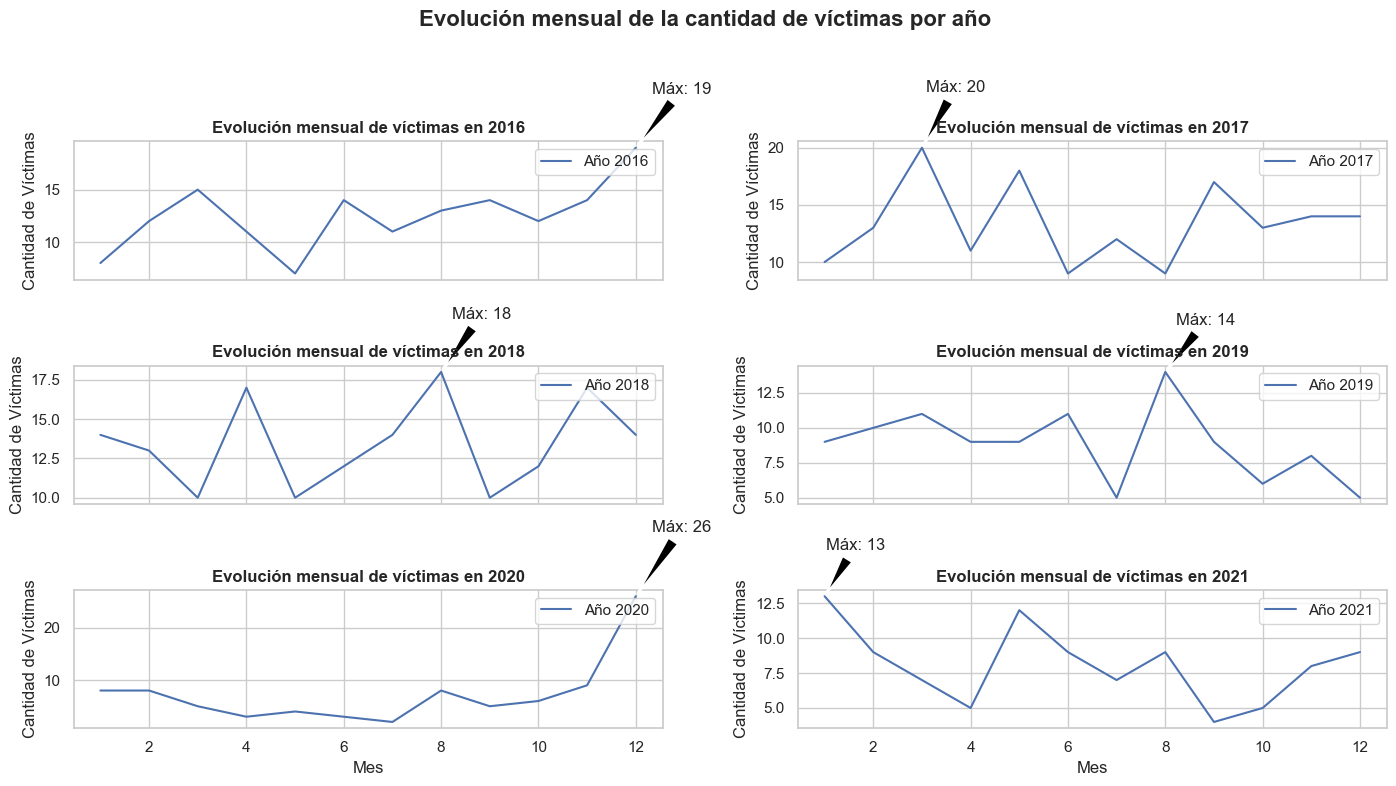

In [189]:
#Se obtiene una lista de años únicos
años = df_homicidios['Anio'].unique()

#Definimos el número de filas y columnas para la cuadrícula de subgráficos
n_filas = 3
n_columnas = 2

#Creamos una figura con subgráficos en una cuadrícula de 2x3
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8), sharex=True)

#Ajustamos el estilo del gráfico utilizando seaborn
sns.set(style="whitegrid")

#Iteramos a través de los años y crea un gráfico por año
for i, year in enumerate(años):
    fila, columna = divmod(i, n_columnas)
    
    #Filtramos los datos para el año actual y agrupa por mes
    data_mensual = (df_homicidios[df_homicidios['Anio'] == year]
                    .groupby('Mes')
                    .agg({'Cantidad_Víctimas':'sum'}))
    
    #Configuramos el subgráfico actual
    ax = axes[fila, columna]
    sns.lineplot(data=data_mensual, x='Mes', y='Cantidad_Víctimas', ax=ax, label=f'Año {year}')
    
    #Encontramos el mes y valor máximo
    max_month = data_mensual['Cantidad_Víctimas'].idxmax()
    max_value = data_mensual['Cantidad_Víctimas'].max()
    
    #Anotamos el valor máximo en el gráfico
    ax.annotate(f'Máx: {max_value}',
                xy=(max_month, max_value),
                xytext=(max_month, max_value + 20),  # Ajusta la posición del texto
                textcoords='offset points',
                arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1.5))
    
    #Mejoramos las etiquetas y título del subgráfico
    ax.set_xlabel('Mes')
    ax.set_ylabel('Cantidad de Víctimas')
    ax.set_title(f'Evolución mensual de víctimas en {year}', weight='bold')
    ax.legend(loc='upper right')

#Mostramos y ajustamos la figura
fig.suptitle('Evolución mensual de la cantidad de víctimas por año', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

#Añadimos un título general a toda la figura
plt.show()

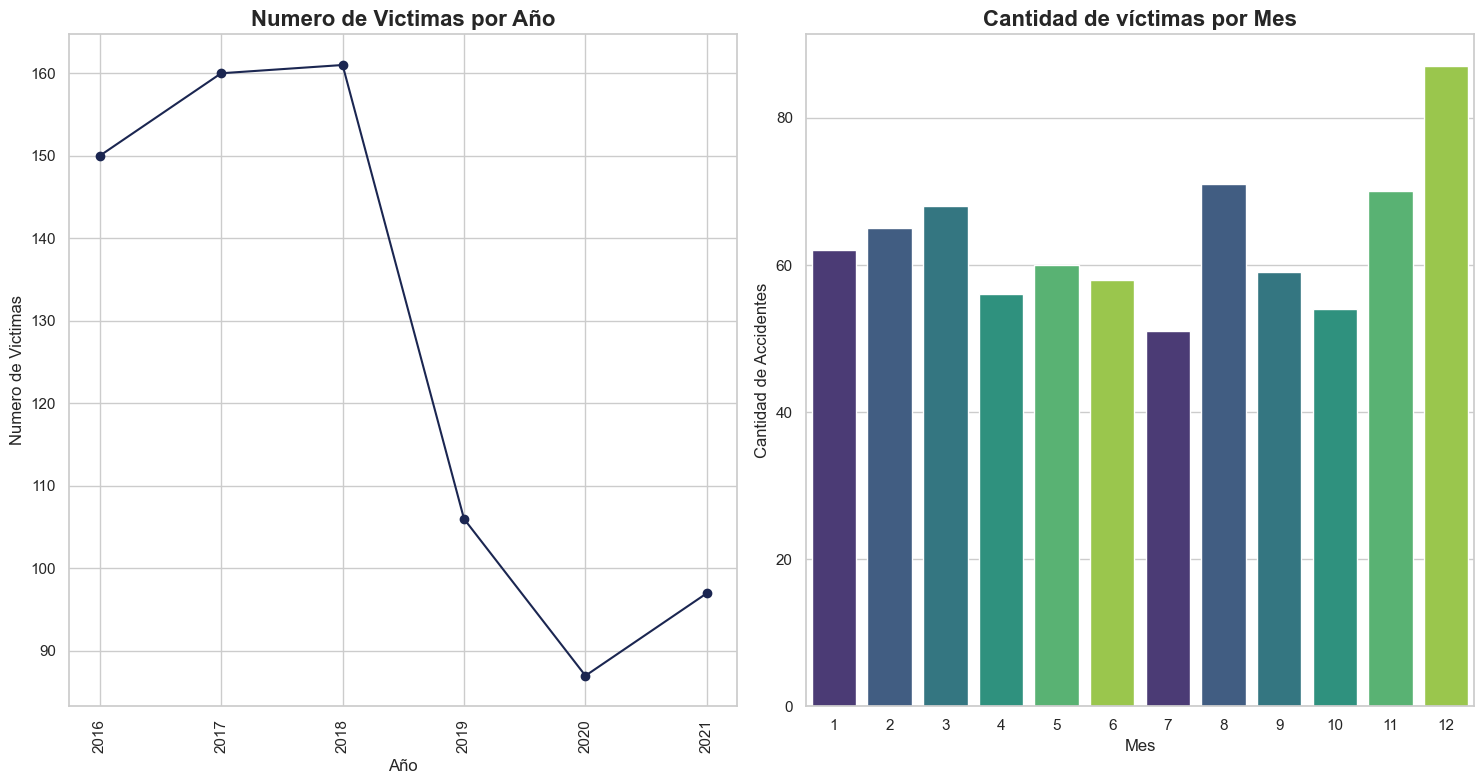

In [190]:
#Filtramos
victimas_per_year = df_homicidios['Cantidad_Víctimas'].groupby(df_homicidios['Anio']).sum()
index = victimas_per_year.index

#Coloreamos de diferentes colores para cada barra
colores_barras = sns.color_palette("viridis", len(index))

#Gráficamos la cantidad de víctimas por año
plt.figure(figsize=(15, 8))

#Gráfico 1: Cantidad de víctimas por año
plt.subplot(1, 2, 1)
plt.plot(index, victimas_per_year, color='#1b2651', marker='o')
plt.xticks(rotation='vertical')
plt.xlabel('Año')
plt.ylabel('Numero de Victimas')
plt.title('Numero de Victimas por Año', fontsize=16, weight='bold')

#Gráfico 2: Cantidad de víctimas por mes
plt.subplot(1, 2, 2)
data = df_homicidios.groupby('Mes').agg({'Cantidad_Víctimas': 'sum'}).reset_index()
ax = sns.barplot(x='Mes', y='Cantidad_Víctimas', data=data, palette=colores_barras)
ax.set_title('Cantidad de víctimas por Mes', fontsize=16, weight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Accidentes')

#Mostramos el gráfico
plt.tight_layout()
plt.show()

**CONCLUSIONES:**

**1. Época Navideña y Verano:**
Durante la época navideña y los meses de verano (Diciembre, Enero y Febrero), se registra la mayor ocurrencia de homicidios. Este patrón podría estar relacionado con diversos factores, como las condiciones climáticas, actividades sociales y cambios en el comportamiento por fiestas.

**2. Impacto del COVID-19 en 2020:**
Se destaca que en el año 2020, los homicidios por accidentes de tránsito fueron notablemente bajos. Este fenómeno puede atribuirse a las restricciones y cambios en el comportamiento durante la pandemia de COVID-19, que afectaron significativamente las actividades diarias y la movilidad.

**2. ¿Cúal es el día, la hora y el rango horario donde ocurren más homicidios por accidentes de tránsito?**

El día de la semana con menor cantidad de víctimas tiene 100 víctimas
El día de la semana con mayor cantidad de víctimas tiene 118 víctimas
La diferencia porcentual es de 18.0


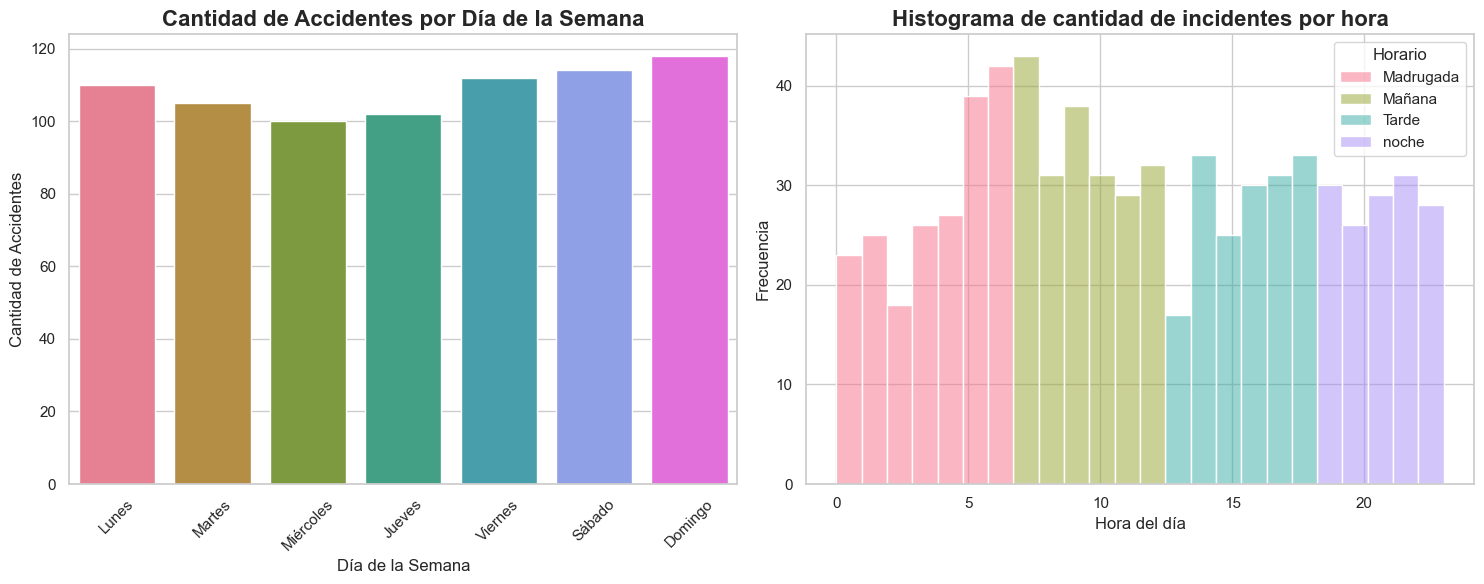

In [191]:
#Primer gráfico (día de la semana)
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])
df_homicidios['Día semana'] = df_homicidios['Fecha'].dt.dayofweek
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_homicidios['Nombre día'] = df_homicidios['Día semana'].map(lambda x: dias_semana[x])
data = df_homicidios.groupby('Nombre día').agg({'Cantidad_Víctimas':'sum'}).reset_index()

#Configuramos de colores diferentes para cada barra
colores_barras_dias = sns.color_palette("husl", len(dias_semana))

#Graficamos ambos graficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#Gráfico 1: Cantidad de accidentes por día de la semana
ax1 = sns.barplot(x='Nombre día', y='Cantidad_Víctimas', data=data, order=dias_semana, palette=colores_barras_dias, ax=axes[0])
ax1.set_title('Cantidad de Accidentes por Día de la Semana', fontsize=16, weight='bold')
ax1.set_xlabel('Día de la Semana')
ax1.set_ylabel('Cantidad de Accidentes')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#Imprimimos resumen
print(f'El día de la semana con menor cantidad de víctimas tiene {data.min()["Cantidad_Víctimas"]} víctimas')
print(f'El día de la semana con mayor cantidad de víctimas tiene {data.max()["Cantidad_Víctimas"]} víctimas')
print(f'La diferencia porcentual es de {round((data.max()["Cantidad_Víctimas"] - data.min()["Cantidad_Víctimas"]) / data.min()["Cantidad_Víctimas"] * 100, 2)}')

#Segundo gráfico (hora del día)
Hora_victimas=df_homicidios[['Parte_Horaria','Cantidad_Víctimas','Comuna']].copy()
Hora_victimas['Parte_Horaria'] = Hora_victimas['Parte_Horaria'].astype(int)
Hora_victimas['Horario'] = Hora_victimas['Parte_Horaria'].apply(lambda x: 'Madrugada' if x <= 6 else ('Mañana' if x > 6 and x <= 12 else ('Tarde' if x > 12 and x <= 18 else 'noche')))
ax2 = plt.subplot(1, 2, 2)
sns.histplot(x='Parte_Horaria', data=Hora_victimas, bins=24, hue='Horario', ax=ax2, palette='husl')
ax2.set_xlabel('Hora del día')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Histograma de cantidad de incidentes por hora', fontsize=16, weight='bold')

# Ajusta el diseño general
plt.tight_layout()
plt.show()

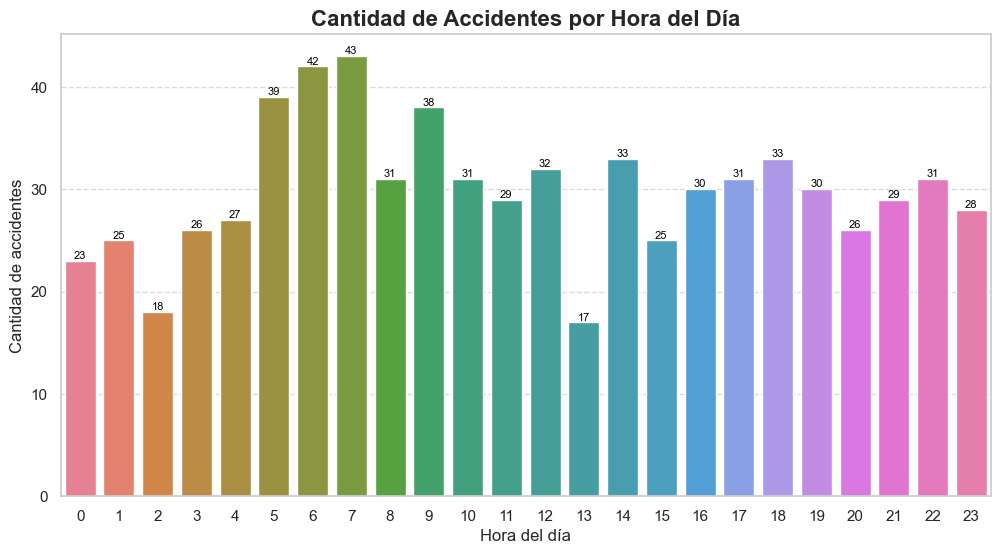

In [192]:
#Convertimos la hora a datetime
df_homicidios['Hora'] = pd.to_datetime(df_homicidios['Hora'])

#Extraemos la hora del día de la columna 'Hora'
df_homicidios['Hora del día'] = df_homicidios['Hora'].dt.hour

#Contamos la cantidad de accidentes por hora del día
data = df_homicidios['Hora del día'].value_counts().sort_index().reset_index()
data.columns = ['Hora del día', 'Cantidad de accidentes']

#Creamos el gráfico de barras con colores diferentes para cada barra
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Hora del día', y='Cantidad de accidentes', data=data, palette='husl')

ax.set_title('Cantidad de Accidentes por Hora del Día', fontsize=16, weight='bold')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Cantidad de accidentes')

#Se agrega el valor encima de cada barra
for index, row in data.iterrows():
    ax.text(row['Hora del día'], row['Cantidad de accidentes'], str(row['Cantidad de accidentes']),
            ha='center', va='bottom', fontsize=8, color='black')

#Se muestra el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**CONCLUSIONES:**
Se observa que los días con mayor incidencia de homicidios por accidentes de tránsito son los lunes, viernes, sábado y domingo. Los fines de semana, especialmente, muestran un aumento significativo, atribuible a las actividades recreativas, compras y eventos sociales. Durante la mañana, la prisa por llegar al trabajo puede contribuir a esta tendencia, mientras que en las noches, las festividades y actividades sociales pueden incidir en el aumento de incidentes. Es esencial considerar estas pautas al implementar medidas preventivas y campañas de concientización para reducir los accidentes viales.



**3. ¿Cúal es el rango etario y sexo a lo largo de los años por homocidios en accidentes de tránsito?**

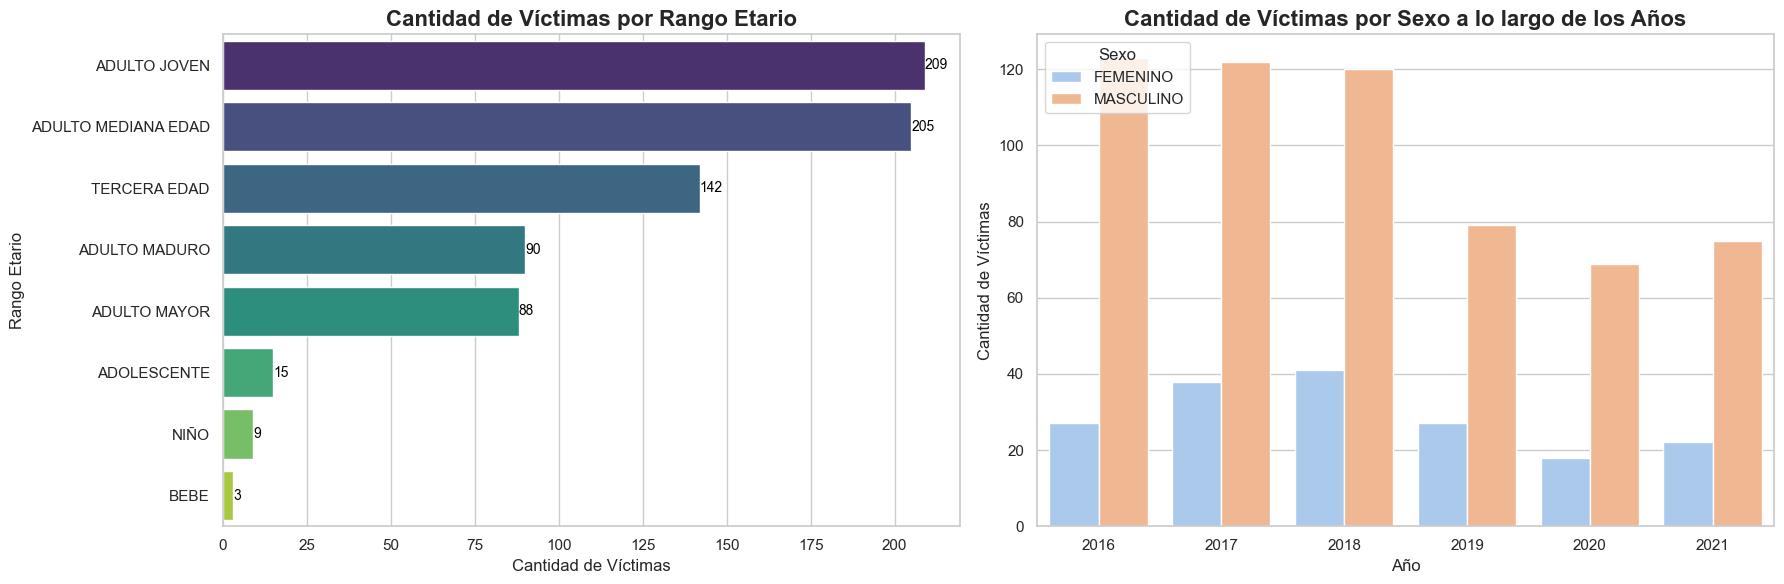

In [193]:
#Filtramos solo las columnas necesarias para el primer gráfico
df_victimas_por_rango_etario = df_homicidios[['Rango_Etario', 'Cantidad_Víctimas']]

#Agrupamos por rango etario y sumar la cantidad de víctimas
data_etario = df_victimas_por_rango_etario.groupby('Rango_Etario')['Cantidad_Víctimas'].sum().reset_index()

#Ordenamos los datos por la cantidad de víctimas en orden descendente
data_etario = data_etario.sort_values(by='Cantidad_Víctimas', ascending=False)

#Creamos el primer gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

#Gráficos de barras por rango etario
sns.barplot(x='Cantidad_Víctimas', y='Rango_Etario', data=data_etario, palette='viridis', ax=axes[0])

#Configuración del primer gráfico
axes[0].set_title('Cantidad de Víctimas por Rango Etario', fontsize=16, weight='bold')
axes[0].set_xlabel('Cantidad de Víctimas')
axes[0].set_ylabel('Rango Etario')

#Añadimos las etiquetas con el número de víctimas encima de cada barra
for index, value in enumerate(data_etario['Cantidad_Víctimas']):
    axes[0].text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

#Filtramos solo las columnas necesarias para el segundo gráfico
df_victimas_por_sexo = df_homicidios[['Anio', 'Sexo', 'Cantidad_Víctimas']]

#Agrupamos por año y sexo, sumando la cantidad de víctimas
data_sexo = df_victimas_por_sexo.groupby(['Anio', 'Sexo'])['Cantidad_Víctimas'].sum().reset_index()

#Creamos el segundo gráfico de barras
sns.barplot(x='Anio', y='Cantidad_Víctimas', hue='Sexo', data=data_sexo, palette='pastel', ax=axes[1])

#Configuramos del segundo gráfico
axes[1].set_title('Cantidad de Víctimas por Sexo a lo largo de los Años', fontsize=16, weight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad de Víctimas')

#Mostramos el gráfico combinado
plt.legend(title='Sexo', loc='upper left')
plt.tight_layout()
plt.show()

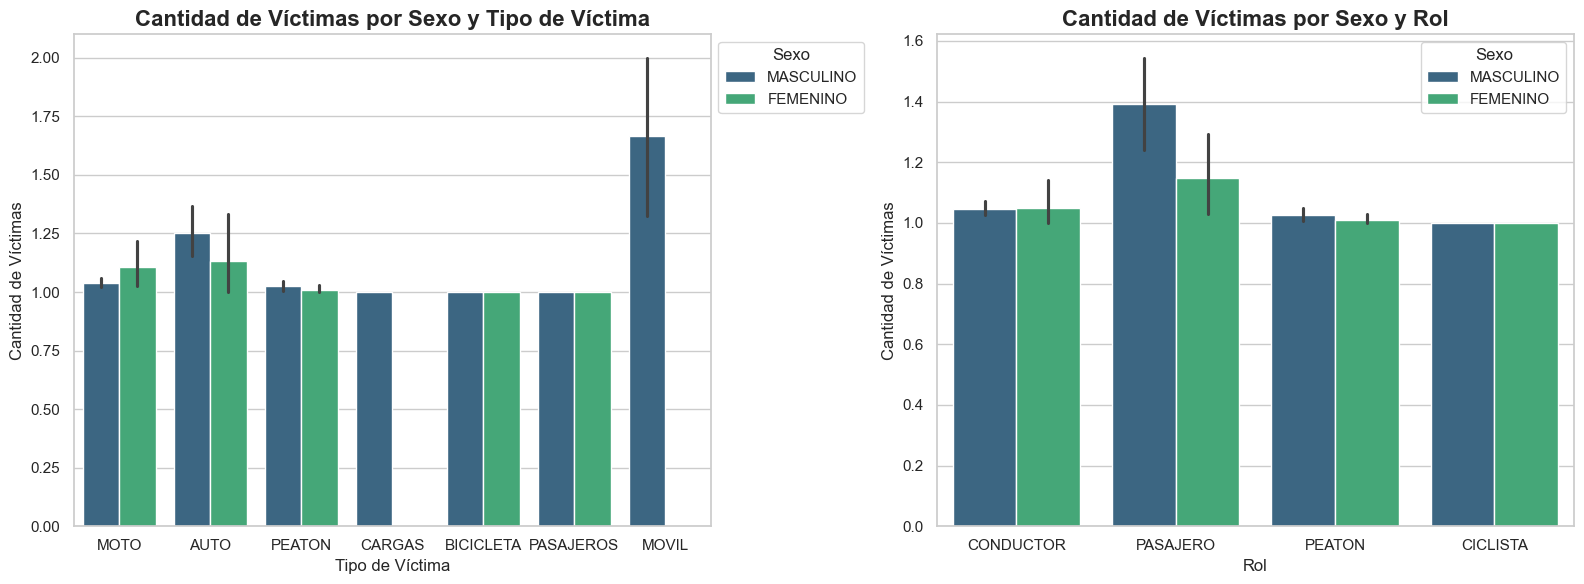

In [194]:
#Filtramos las columnas necesarias para el primer gráfico
data_gender_victim_type = df_homicidios[['Sexo', 'Victima', 'Cantidad_Víctimas']]

#Configuramos el estilo de seaborn
sns.set(style="whitegrid")

#Creamos figura y ejes para el primer gráfico
plt.figure(figsize=(16, 6))

#Graficamos las barras apiladas para cantidad de víctimas por sexo y tipo de víctima
plt.subplot(1, 2, 1)
sns.barplot(x='Victima', y='Cantidad_Víctimas', hue='Sexo', data=data_gender_victim_type, palette='viridis')
plt.title('Cantidad de Víctimas por Sexo y Tipo de Víctima', fontsize=16, weight='bold')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sexo', bbox_to_anchor=(1, 1))

#Filtramos las columnas necesarias para el segundo gráfico
data_gender_role = df_homicidios[['Sexo', 'Rol', 'Cantidad_Víctimas']]

#Creamos la figura y ejes para el segundo gráfico
plt.subplot(1, 2, 2)
#Graficamos de barras apiladas para cantidad de víctimas por sexo y rol
sns.barplot(x='Rol', y='Cantidad_Víctimas', hue='Sexo', data=data_gender_role, palette='viridis')
plt.title('Cantidad de Víctimas por Sexo y Rol', fontsize=16, weight='bold')
plt.xlabel('Rol')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sexo', bbox_to_anchor=(1, 1))

#Ajustamos el diseño general
plt.tight_layout()
plt.show()

**CONCLUSIONES:**

**1. Rango Etario y Homicidios por Accidentes de Tránsito:**
La mayor incidencia de homicidios por accidentes de tránsito se registra en personas pertenecientes a los grupos de "Adulto Joven", "Adulto de Mediana Edad" y "Adulto Mayor". Esto puede atribuirse a que estos grupos demográficos son más propensos a tener una mayor actividad social y utilizar medios de transporte. Sin embargo, es importante destacar que los "Adultos Mayores" muestran un alto número de homicidios, posiblemente relacionado con la vulnerabilidad física asociada a la edad avanzada.

**2. Diferencias de Género:**
Aunque la cantidad de homicidios por accidentes de tránsito es significativa en ambos géneros, históricamente se observa que el género masculino presenta una mayor incidencia. No obstante, es alentador notar que en los últimos años ha habido una disminución, sugiriendo posiblemente un cambio en la actitud defensiva o conciencia en la conducción por parte de los hombres.

**3. Análisis del Rol de la Víctima:**
Se destaca la ausencia de diferencias notables en cuanto al tipo de víctima y su rol, ya que ambos géneros se ven afectados de manera similar. Este hallazgo indica que factores externos, como condiciones de tráfico, infraestructura vial o políticas de seguridad vial, pueden estar influyendo de manera equitativa en hombres y mujeres. Para abordar eficazmente esta problemática, se sugiere un enfoque integral que considere las diversas dimensiones del problema y promueva estrategias inclusivas para mejorar la seguridad en el tránsito para todas las personas.

**4. ¿Cuales son los principales medios que generan mayor cantidad de homicidios y cuales son las principales víctimas?**

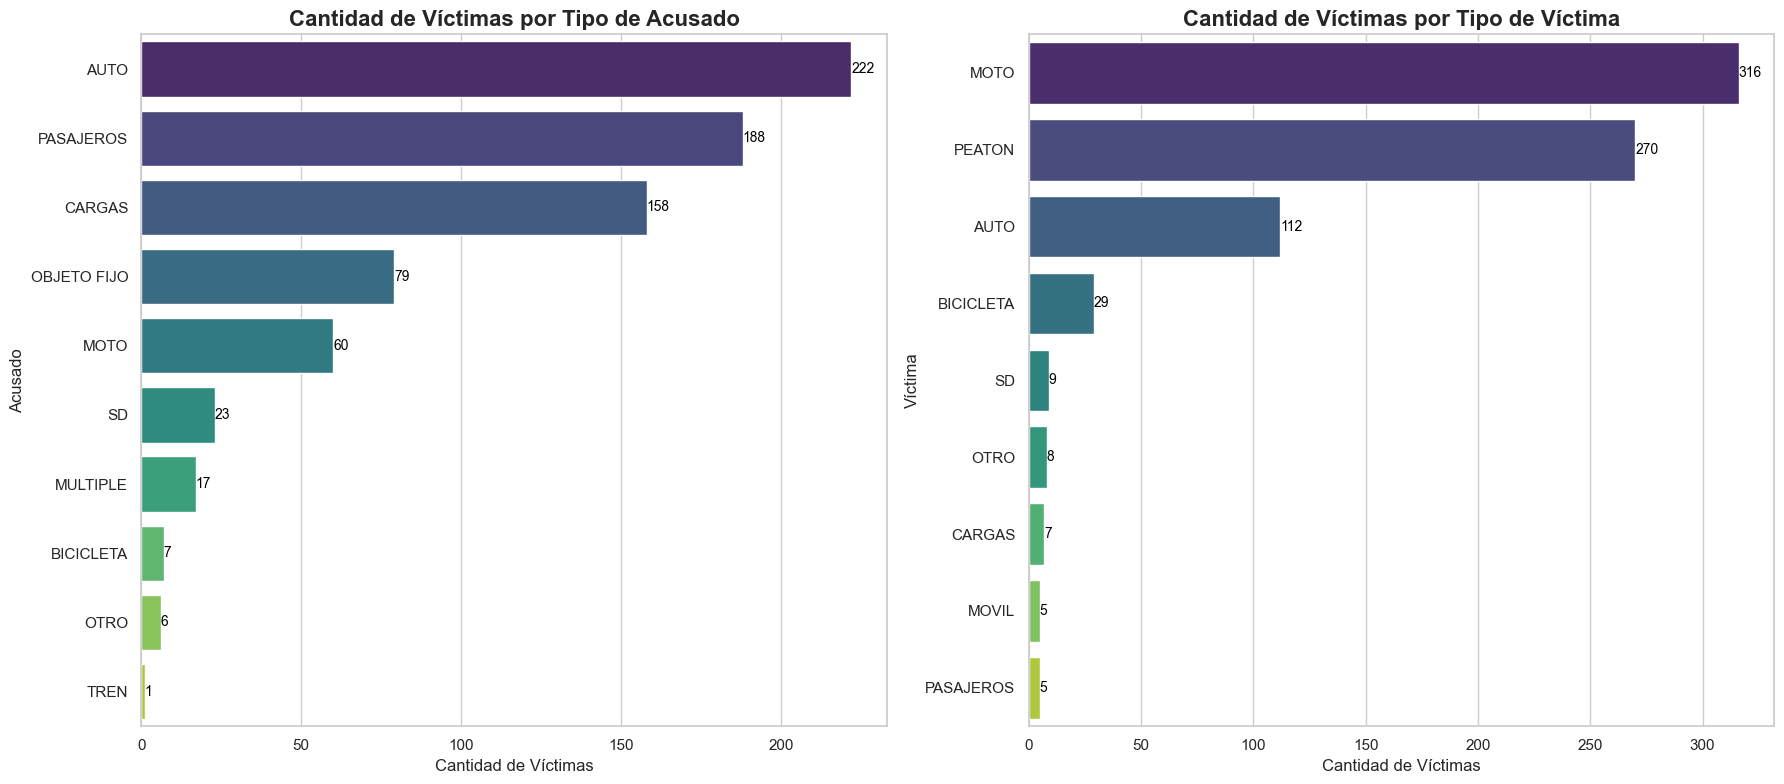

In [195]:
#Filtramos las columnas necesarias para víctimas por acusado
df_victimas_acusados = df_homicidios[['Acusado', 'Cantidad_Víctimas']]
data_acusados = df_victimas_acusados.groupby('Acusado')['Cantidad_Víctimas'].sum().reset_index()
data_acusados = data_acusados.sort_values(by='Cantidad_Víctimas', ascending=False)

#Filtramos las columnas necesarias para víctimas por víctima
df_victimas_por_victima = df_homicidios[['Víctima', 'Cantidad_Víctimas']]
data_victimas = df_victimas_por_victima.groupby('Víctima')['Cantidad_Víctimas'].sum().reset_index()
data_victimas = data_victimas.sort_values(by='Cantidad_Víctimas', ascending=False)

#Creamos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

#Graficamos las barras para víctimas por acusado
sns.barplot(x='Cantidad_Víctimas', y='Acusado', data=data_acusados, palette='viridis', ax=axes[0])
axes[0].set_title('Cantidad de Víctimas por Tipo de Acusado', fontsize=16, weight='bold')
axes[0].set_xlabel('Cantidad de Víctimas')
axes[0].set_ylabel('Acusado')
for index, value in enumerate(data_acusados['Cantidad_Víctimas']):
    axes[0].text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

#Graficamos las barras para víctimas por víctima
sns.barplot(x='Cantidad_Víctimas', y='Víctima', data=data_victimas, palette='viridis', ax=axes[1])
axes[1].set_title('Cantidad de Víctimas por Tipo de Víctima', fontsize=16, weight='bold')
axes[1].set_xlabel('Cantidad de Víctimas')
axes[1].set_ylabel('Víctima')
for index, value in enumerate(data_victimas['Cantidad_Víctimas']):
    axes[1].text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

#Ajustamos el diseño
plt.tight_layout()
plt.show()

**CONCLUSIONES:**

**1. Incidencia de Homicidios por Tipo de Vehículo:**
El análisis revela que los vehículos de transporte como "AUTO" y "CARGAS" destacan como los principales involucrados en homicidios por accidentes de tránsito. Esto sugiere la necesidad de medidas específicas para mejorar la seguridad vial relacionada con estos tipos de vehículos, como campañas de concientización, controles de velocidad y políticas de regulación más estrictas.
La prevalencia de homicidios asociados con estos vehículos podría estar vinculada a su mayor presencia en las vías, resaltando la importancia de implementar estrategias de seguridad que aborden la conducta de los conductores y las condiciones del tráfico.

**2. Vulnerabilidad de las Víctimas:**
Se destaca que las víctimas de homicidios por accidentes de tránsito son predominantemente "MOTO" y "PEATÓN". Este hallazgo resalta la vulnerabilidad inherente de estos grupos, ya que los peatones carecen de protección y los conductores de motocicletas enfrentan un riesgo significativo debido a la falta de protección estructural.
Las políticas de seguridad vial deben enfocarse en medidas específicas para mejorar la protección de estos grupos, como zonas peatonales seguras, campañas de concientización sobre la importancia del uso del casco y otras prácticas seguras para los conductores de motocicletas.

**3. Consideraciones Adicionales:**
Aunque los "AUTO" y "CARGAS" son responsables de un alto número de homicidios, es fundamental analizar las circunstancias específicas que contribuyen a estos incidentes, como el exceso de velocidad, el estado del vehículo y las condiciones de la carretera. Este análisis puede proporcionar información valiosa para desarrollar estrategias de prevención más efectivas.
Además, la implementación de tecnologías de seguridad avanzadas en vehículos y la promoción de conductas seguras en la conducción pueden contribuir significativamente a reducir la incidencia de homicidios por accidentes de tránsito. La colaboración entre autoridades de tráfico, organizaciones de seguridad vial y la sociedad en general es esencial para abordar estos desafíos de manera integral.



**5. ¿Cuales son los zonas de ocurren la mayor cantidad de homicidios por accidentes de tránsito?**

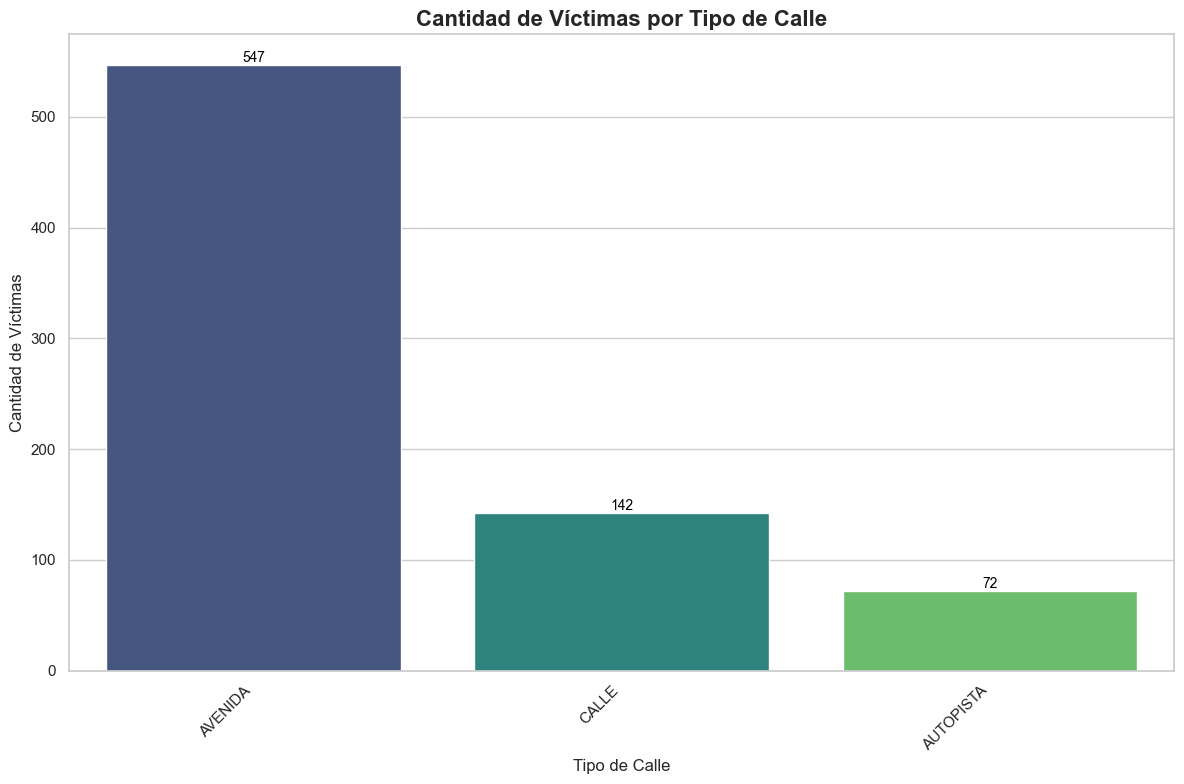

In [196]:
#Filtramos las columnas necesarias
df_victimas_por_calle = df_homicidios[['Tipo_de_Calle', 'Cantidad_Víctimas']]

#Agrupamos por tipo de calle y sumar la cantidad de víctimas
data = df_victimas_por_calle.groupby('Tipo_de_Calle')['Cantidad_Víctimas'].sum().reset_index()

#Ordenamos los datos por la cantidad de víctimas en orden descendente
data = data.sort_values(by='Cantidad_Víctimas', ascending=False)

#Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tipo_de_Calle', y='Cantidad_Víctimas', data=data, palette='viridis')

#Configuración del gráfico
ax.set_title('Cantidad de Víctimas por Tipo de Calle', fontsize=16, weight='bold')
ax.set_xlabel('Tipo de Calle')
ax.set_ylabel('Cantidad de Víctimas')

#Añadimos etiquetas con el número de víctimas encima de cada barra
for index, value in enumerate(data['Cantidad_Víctimas']):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

#Rotamos los labels del eje x en 45 grados para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [212]:
import folium
from folium.plugins import HeatMap

# Filtramos las columnas necesarias
df_mapa = df_homicidios[['Pos Y', 'Pos X', 'Cantidad_Víctimas']]

# Eliminamos filas con valores nulos en las columnas de posición
df_mapa = df_mapa.dropna(subset=['Pos X', 'Pos Y'])

# Creamos un mapa centrado en la ubicación media de los homicidios
mapa = folium.Map(location=[df_mapa['Pos Y'].mean(), df_mapa['Pos X'].mean()], zoom_start=12, control_scale=True)

# Cargamos el GeoJSON como base del mapa
geojson_file = 'Dataset/ba_map.json'
folium.GeoJson(geojson_file).add_to(mapa)

# Creamos un mapa de calor con la cantidad de víctimas
heat_data = [[row['Pos Y'], row['Pos X'], row['Cantidad_Víctimas']] for index, row in df_mapa.iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=13).add_to(mapa)

# Configuración de la leyenda en función de los colores del mapa de calor
min_value = df_mapa['Cantidad_Víctimas'].min()
max_value = df_mapa['Cantidad_Víctimas'].max()

legend_html = f'''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 200px; height: 90px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">
     &nbsp; <b> Leyenda </b> <br>
     &nbsp; <span style="background-color: #0000ff; padding: 5px;"> </span> &nbsp; Menos {min_value} víctimas <br>
     &nbsp; <span style="background-color: #00ff00; padding: 5px;"> </span> &nbsp; Entre {min_value + 1} y {max_value // 2} víctimas <br>
     &nbsp; <span style="background-color: #ff0000; padding: 5px;"> </span> &nbsp; Más de {max_value // 2} víctimas <br>
     </div>
     '''

mapa.get_root().html.add_child(folium.Element(legend_html))

# Configuración del mapa
mapa.save('mapa_homicidios_con_geojson.html')
mapa

**CONCLUSIONES:**
La análisis revela que la mayoría de los homicidios relacionados con accidentes de tránsito se concentran en las avenidas, evidenciando una serie de factores que contribuyen a esta tendencia.

**1. Tráfico Intenso y Velocidades Elevadas:**
Las avenidas suelen caracterizarse por un tráfico más denso y velocidades más elevadas, factores que aumentan el riesgo de accidentes de tránsito. La combinación de vehículos en movimiento a altas velocidades puede contribuir a situaciones más propensas a incidentes mortales.

**2. Intersecciones y Cruces Peligrosos:**
Las avenidas suelen tener numerosas intersecciones y cruces, puntos críticos donde pueden ocurrir colisiones y accidentes. La complejidad de estos puntos de encuentro puede aumentar la probabilidad de situaciones peligrosas, especialmente si no hay una adecuada señalización o control del tráfico.

#### 3.3.3. EDA - *df_lesiones*

**6. ¿Cual ha sido la evolución, el año y el mes de las lesiones provocados por accidentes de tránsito?**

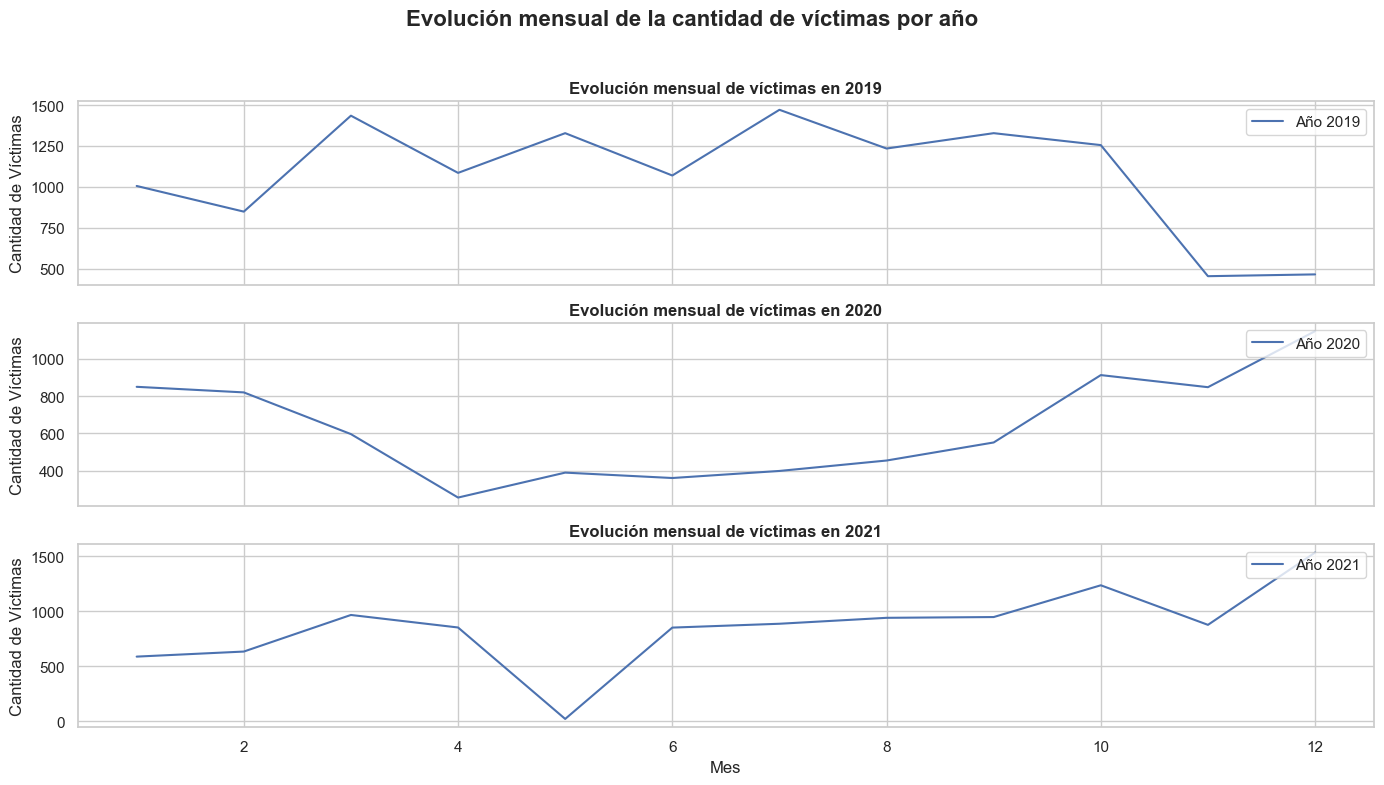

In [198]:
#Se obtiene una lista de años únicos
años = df_lesiones['Anio'].unique()

#Definimos el número de filas y columnas para la cuadrícula de subgráficos
n_filas = len(años)
n_columnas = 1

#Creamos una figura con subgráficos en una cuadrícula de n_filas x n_columnas
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8), sharex=True)

#Ajustamos el estilo del gráfico utilizando seaborn
sns.set(style="whitegrid")

#Iteramos a través de los años y creamos un gráfico por año
for i, year in enumerate(años):
    fila, columna = divmod(i, n_columnas)
    
    #Configuramos el subgráfico actual
    ax = axes[fila] if n_filas > 1 else axes
    
    #Filtramos los datos para el año actual y agrupamos por mes
    data_mensual = (df_lesiones[df_lesiones['Anio'] == year]
                    .groupby('Mes')
                    .agg({'Cantidad_Víctimas':'sum'}))
    
    #Configuramos el subgráfico actual
    sns.lineplot(data=data_mensual, x='Mes', y='Cantidad_Víctimas', ax=ax, label=f'Año {year}')
    
    #Mejoramos las etiquetas y título del subgráfico
    ax.set_xlabel('Mes')
    ax.set_ylabel('Cantidad de Víctimas')
    ax.set_title(f'Evolución mensual de víctimas en {year}', weight='bold')
    ax.legend(loc='upper right')

#Mostramos y ajustamos la figura
fig.suptitle('Evolución mensual de la cantidad de víctimas por año', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

#Añadimos un título general a toda la figura
plt.show()

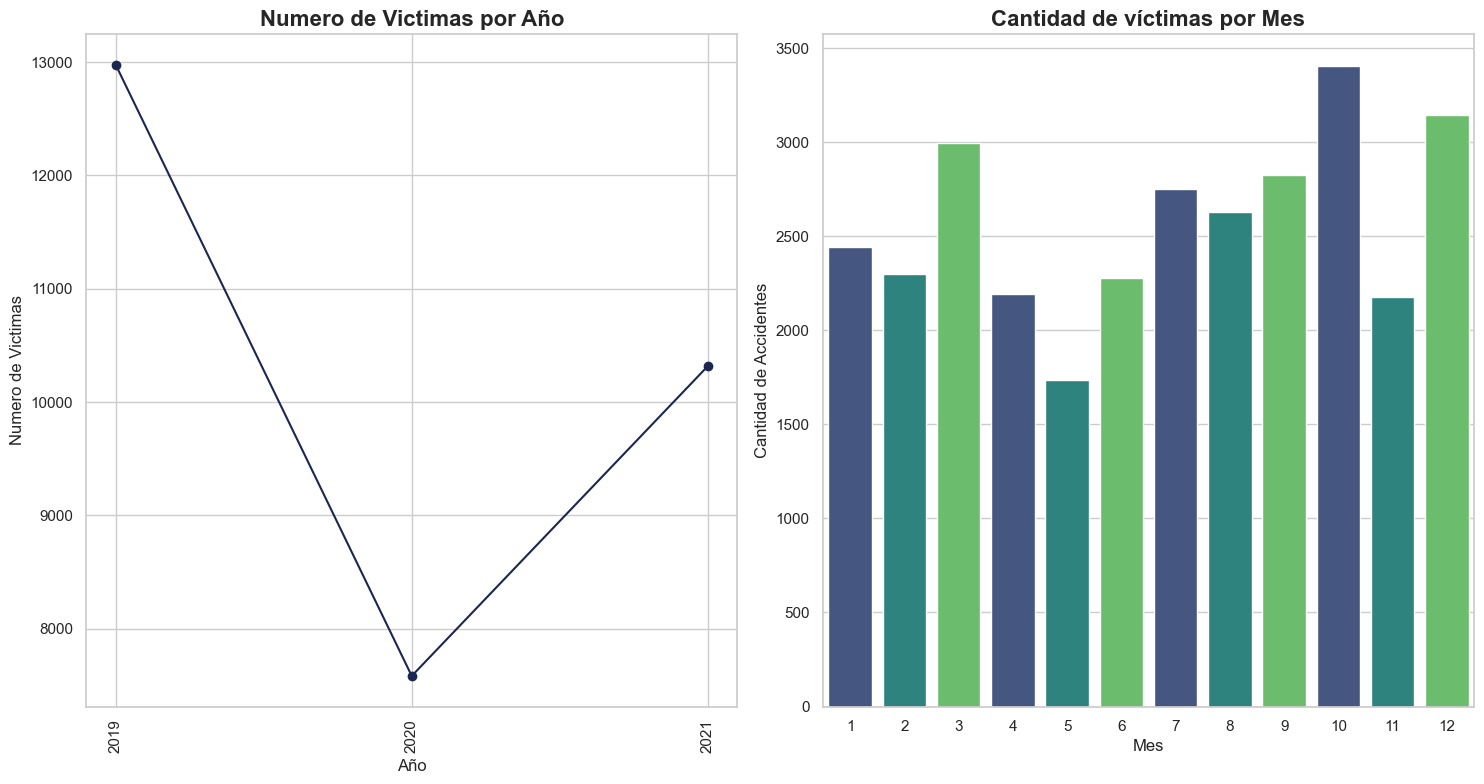

In [199]:
# Filtramos
victimas_per_year = df_lesiones['Cantidad_Víctimas'].groupby(df_lesiones['Anio']).sum()
index = victimas_per_year.index

#Coloreamos de diferentes colores para cada barra
colores_barras = sns.color_palette("viridis", len(index))

# Gráficamos la cantidad de víctimas por año
plt.figure(figsize=(15, 8))

# Gráfico 1: Cantidad de víctimas por año
plt.subplot(1, 2, 1)
plt.plot(index, victimas_per_year, color='#1b2651', marker='o')
plt.xticks(rotation='vertical')
plt.xticks(index.astype(int))  # Mostrar solo la parte entera
plt.xlabel('Año')
plt.ylabel('Numero de Victimas')
plt.title('Numero de Victimas por Año', fontsize=16, weight='bold')

# Gráfico 2: Cantidad de víctimas por mes
plt.subplot(1, 2, 2)
data = df_lesiones.groupby('Mes').agg({'Cantidad_Víctimas': 'sum'}).reset_index()
ax = sns.barplot(x='Mes', y='Cantidad_Víctimas', data=data, palette=colores_barras)
ax.set_title('Cantidad de víctimas por Mes', fontsize=16, weight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Accidentes')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

**CONCLUSIONES:**

**1. Época Navideña y Verano:**
Durante la época navideña y los meses de verano (Diciembre, Enero y Febrero), se registra la mayor ocurrencia de lesiones por accidentes de tránsito. Este patrón podría estar relacionado con diversos factores, como las condiciones climáticas, actividades sociales y cambios en el comportamiento por fiestas.

**2. Impacto del COVID-19 en 2020:**
Se destaca que en el año 2020, las lesiones por accidentes de tránsito fueron notablemente bajos. Este fenómeno puede atribuirse a las restricciones y cambios en el comportamiento durante la pandemia de COVID-19, que afectaron significativamente las actividades diarias y la movilidad. También se observa que a finales del año se elevan debido a menos restricciones sociales por parte del gobierno.

**7. ¿Cúal es el día, la hora y el rango horario donde ocurren más lesiones por accidentes de tránsito?**

El día de la semana con menor cantidad de víctimas tiene 3277.0 víctimas
El día de la semana con mayor cantidad de víctimas tiene 4973.0 víctimas
La diferencia porcentual es de 51.75


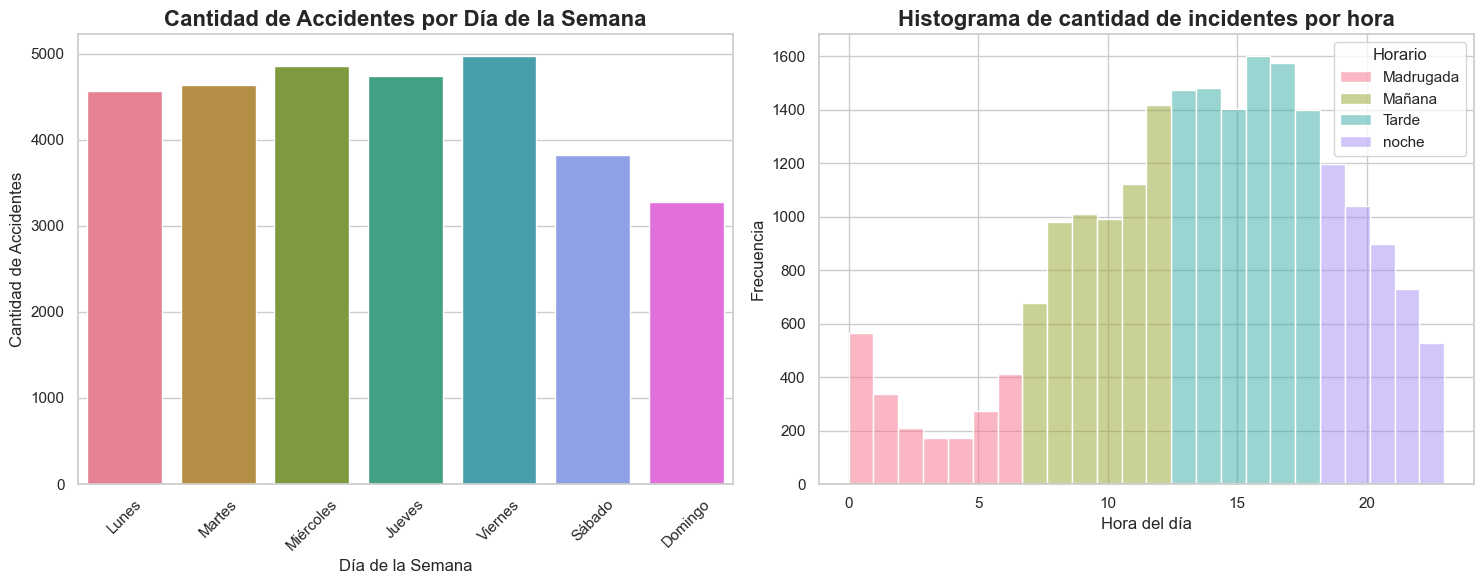

In [200]:
#Primer gráfico (día de la semana)
df_lesiones['Fecha'] = pd.to_datetime(df_lesiones['Fecha'])
df_lesiones['Día semana'] = df_lesiones['Fecha'].dt.dayofweek
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_lesiones['Nombre día'] = df_lesiones['Día semana'].map(lambda x: dias_semana[x])
data = df_lesiones.groupby('Nombre día').agg({'Cantidad_Víctimas':'sum'}).reset_index()

#Configuramos de colores diferentes para cada barra
colores_barras_dias = sns.color_palette("husl", len(dias_semana))

#Graficamos ambos graficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#Gráfico 1: Cantidad de accidentes por día de la semana
ax1 = sns.barplot(x='Nombre día', y='Cantidad_Víctimas', data=data, order=dias_semana, palette=colores_barras_dias, ax=axes[0])
ax1.set_title('Cantidad de Accidentes por Día de la Semana', fontsize=16, weight='bold')
ax1.set_xlabel('Día de la Semana')
ax1.set_ylabel('Cantidad de Accidentes')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#Imprimimos resumen
print(f'El día de la semana con menor cantidad de víctimas tiene {data.min()["Cantidad_Víctimas"]} víctimas')
print(f'El día de la semana con mayor cantidad de víctimas tiene {data.max()["Cantidad_Víctimas"]} víctimas')
print(f'La diferencia porcentual es de {round((data.max()["Cantidad_Víctimas"] - data.min()["Cantidad_Víctimas"]) / data.min()["Cantidad_Víctimas"] * 100, 2)}')

#Segundo gráfico (hora del día)
Hora_victimas=df_lesiones[['Parte_Horaria','Cantidad_Víctimas','Comuna']].copy()
Hora_victimas['Parte_Horaria'] = Hora_victimas['Parte_Horaria'].astype(int)
Hora_victimas['Horario'] = Hora_victimas['Parte_Horaria'].apply(lambda x: 'Madrugada' if x <= 6 else ('Mañana' if x > 6 and x <= 12 else ('Tarde' if x > 12 and x <= 18 else 'noche')))
ax2 = plt.subplot(1, 2, 2)
sns.histplot(x='Parte_Horaria', data=Hora_victimas, bins=24, hue='Horario', ax=ax2, palette='husl')
ax2.set_xlabel('Hora del día')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Histograma de cantidad de incidentes por hora', fontsize=16, weight='bold')

# Ajusta el diseño general
plt.tight_layout()
plt.show()

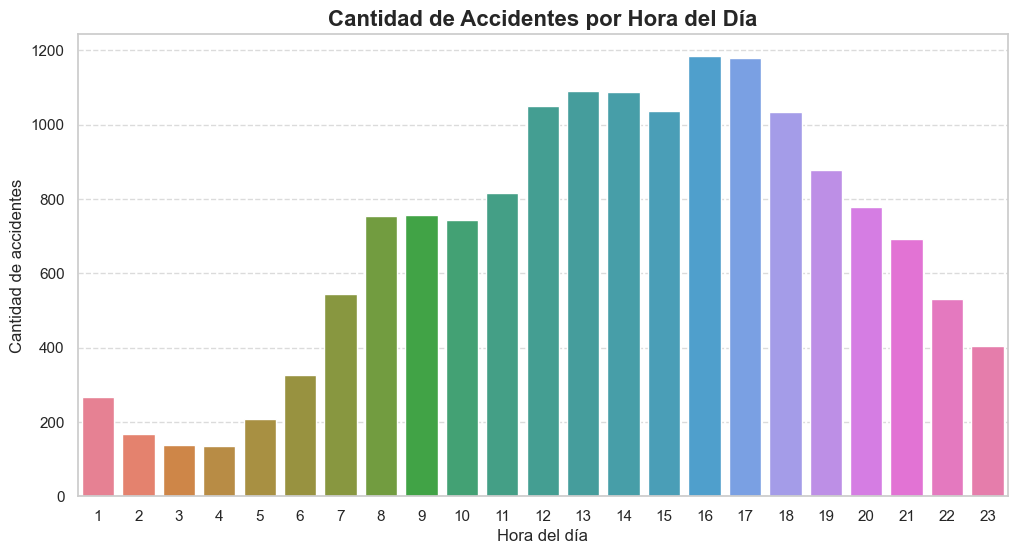

In [201]:
# Convertimos la hora a datetime
df_lesiones['Hora'] = pd.to_datetime(df_lesiones['Hora'])

# Extraemos la hora del día de la columna 'Hora'
df_lesiones['Hora del día'] = df_lesiones['Hora'].dt.hour

# Filtramos la hora 0
df_lesiones_filtrado = df_lesiones[df_lesiones['Hora del día'] != 0]

# Contamos la cantidad de accidentes por hora del día
data = df_lesiones_filtrado['Hora del día'].value_counts().sort_index().reset_index()
data.columns = ['Hora del día', 'Cantidad de accidentes']

# Creamos el gráfico de barras con colores diferentes para cada barra
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Hora del día', y='Cantidad de accidentes', data=data, palette='husl')

ax.set_title('Cantidad de Accidentes por Hora del Día', fontsize=16, weight='bold')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Cantidad de accidentes')

# Se muestra el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**CONCLUSIONES:**
En nuestro análisis, identificamos un patrón significativo: los días de semana presentan una mayor incidencia de lesiones por accidentes de tránsito en comparación con los fines de semana. Esta tendencia podría atribuirse a la rutina laboral y de desplazamiento de la mayoría de las personas.

**1. Horarios Pico de Tráfico:**
Los días laborables suelen tener horarios pico de tráfico, con muchas personas dirigiéndose a sus trabajos temprano en la mañana y regresando a casa por la tarde. Este aumento en la actividad vial podría contribuir a un mayor número de incidentes.

**2 .Cambios en Actitudes de Conducción:**
El estrés asociado con la rutina diaria puede influir en las actitudes de conducción de las personas. El cambio de actitud defensiva a ofensiva por el estrés y la prisa podría aumentar el riesgo de accidentes.

**8. ¿Cúal es el rango etario y sexo a lo largo de los años por lesiones en accidentes de tránsito?**

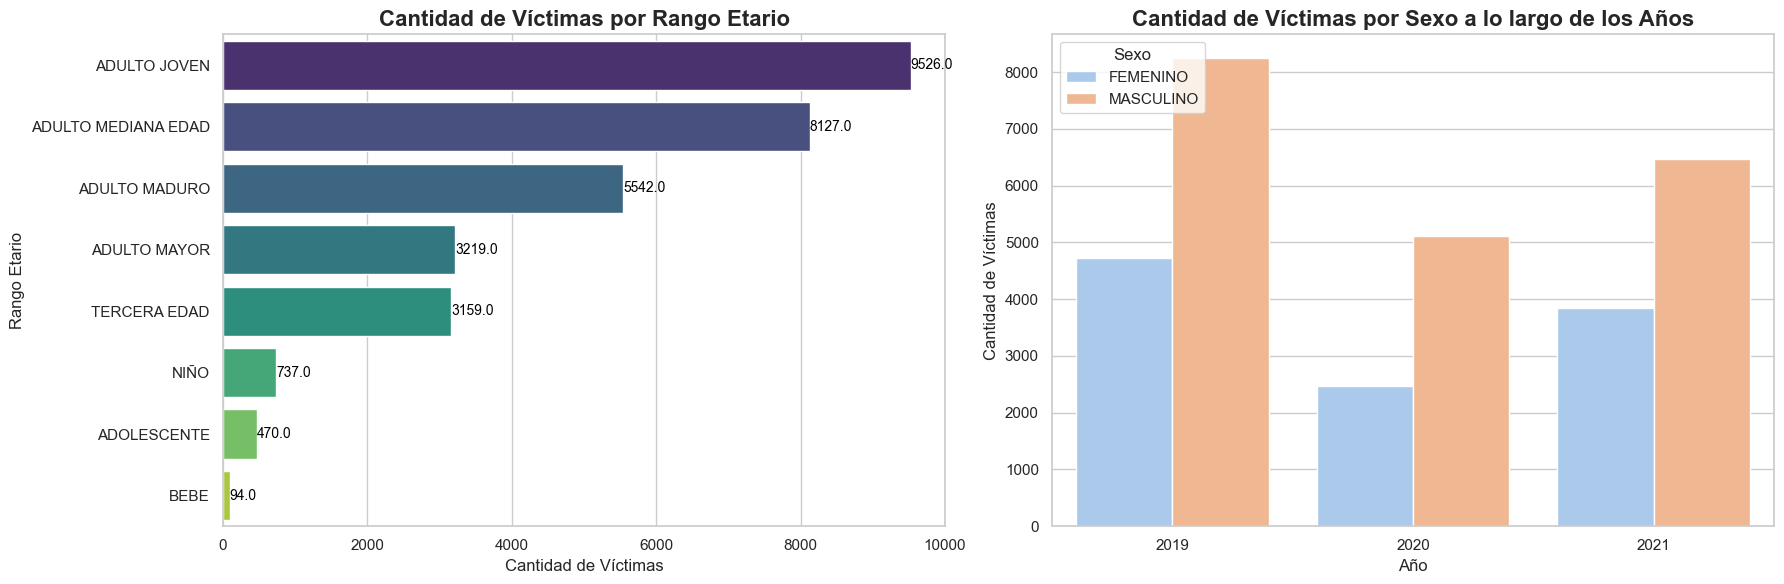

In [202]:
#Filtramos solo las columnas necesarias para el primer gráfico
df_victimas_por_rango_etario = df_lesiones[['Rango_Etario', 'Cantidad_Víctimas']]

#Agrupamos por rango etario y sumar la cantidad de víctimas
data_etario = df_victimas_por_rango_etario.groupby('Rango_Etario')['Cantidad_Víctimas'].sum().reset_index()

#Ordenamos los datos por la cantidad de víctimas en orden descendente
data_etario = data_etario.sort_values(by='Cantidad_Víctimas', ascending=False)

#Creamos el primer gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

#Gráficos de barras por rango etario
sns.barplot(x='Cantidad_Víctimas', y='Rango_Etario', data=data_etario, palette='viridis', ax=axes[0])

#Configuración del primer gráfico
axes[0].set_title('Cantidad de Víctimas por Rango Etario', fontsize=16, weight='bold')
axes[0].set_xlabel('Cantidad de Víctimas')
axes[0].set_ylabel('Rango Etario')

#Añadimos las etiquetas con el número de víctimas encima de cada barra
for index, value in enumerate(data_etario['Cantidad_Víctimas']):
    axes[0].text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

#Filtramos solo las columnas necesarias para el segundo gráfico
df_victimas_por_sexo = df_lesiones[['Anio', 'Sexo', 'Cantidad_Víctimas']]

#Agrupamos por año y sexo, sumando la cantidad de víctimas
data_sexo = df_victimas_por_sexo.groupby(['Anio', 'Sexo'])['Cantidad_Víctimas'].sum().reset_index()

#Creamos el segundo gráfico de barras
sns.barplot(x='Anio', y='Cantidad_Víctimas', hue='Sexo', data=data_sexo, palette='pastel', ax=axes[1])

#Configuramos del segundo gráfico
axes[1].set_title('Cantidad de Víctimas por Sexo a lo largo de los Años', fontsize=16, weight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad de Víctimas')

#Mostramos el gráfico combinado
plt.legend(title='Sexo', loc='upper left')
plt.tight_layout()
plt.show()

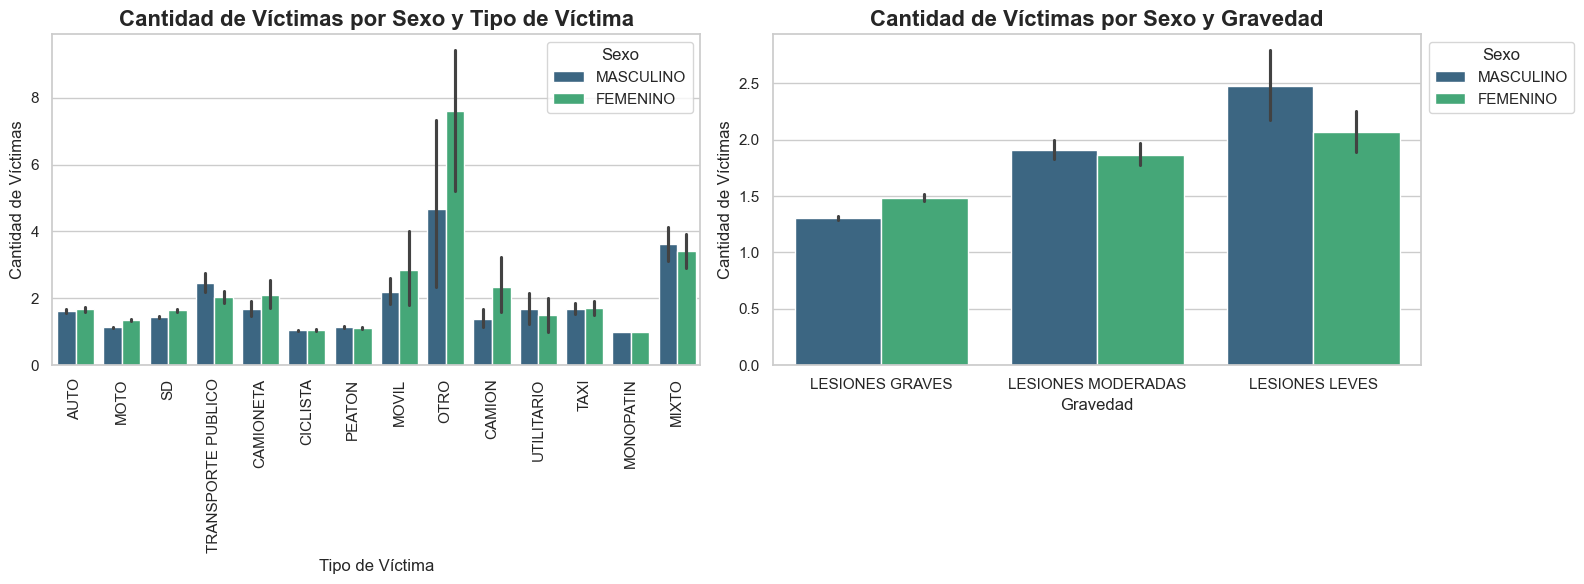

In [203]:
#Filtramos las columnas necesarias para el primer gráfico
data_gender_victim_type = df_lesiones[['Sexo', 'Víctima', 'Cantidad_Víctimas']]

#Configuramos el estilo de seaborn
sns.set(style="whitegrid")

#Creamos figura y ejes para el primer gráfico
plt.figure(figsize=(16, 6))

#Graficamos las barras apiladas para cantidad de víctimas por sexo y tipo de víctima
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Víctima', y='Cantidad_Víctimas', hue='Sexo', data=data_gender_victim_type, palette='viridis')

#Rotamos los labels del eje x en el primer gráfico
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.title('Cantidad de Víctimas por Sexo y Tipo de Víctima', fontsize=16, weight='bold')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sexo', bbox_to_anchor=(1, 1))

#Filtramos las columnas necesarias para el segundo gráfico
data_gender_role = df_lesiones[['Sexo', 'Gravedad', 'Cantidad_Víctimas']]

#Creamos la figura y ejes para el segundo gráfico
plt.subplot(1, 2, 2)
#Graficamos de barras apiladas para cantidad de víctimas por sexo y rol
sns.barplot(x='Gravedad', y='Cantidad_Víctimas', hue='Sexo', data=data_gender_role, palette='viridis')
plt.title('Cantidad de Víctimas por Sexo y Gravedad', fontsize=16, weight='bold')
plt.xlabel('Gravedad')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sexo', bbox_to_anchor=(1, 1))

#Ajustamos el diseño general
plt.tight_layout()
plt.show()

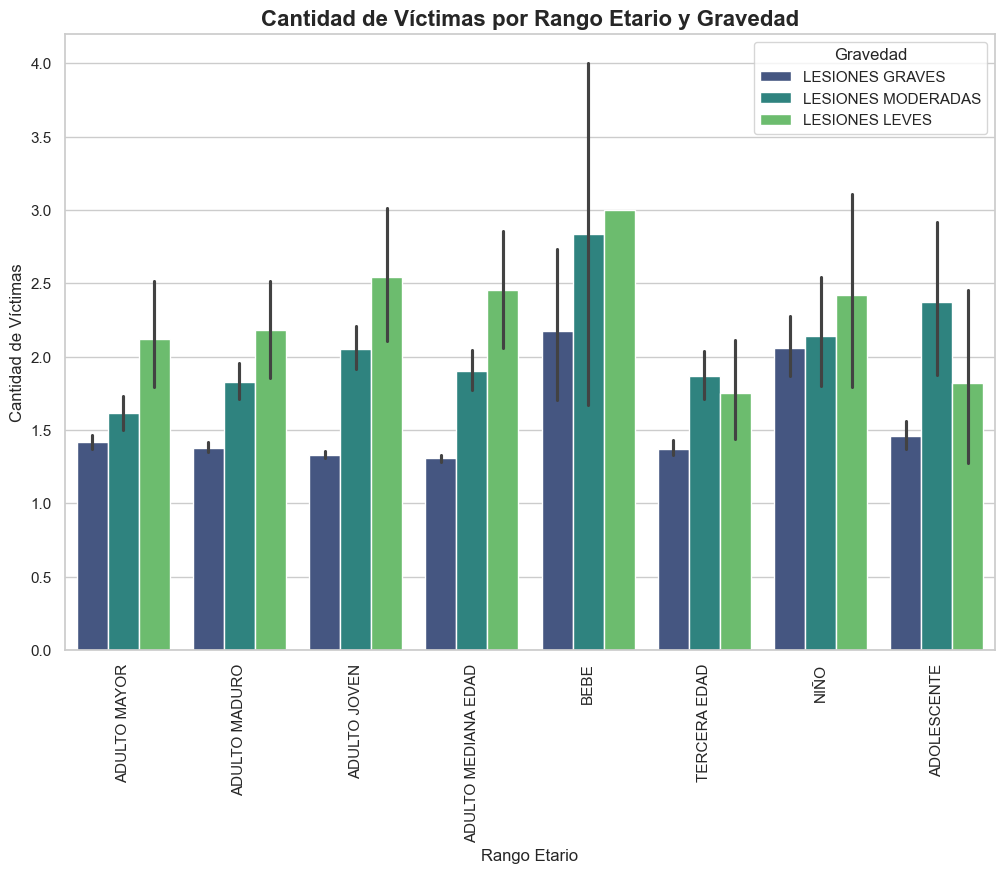

In [204]:
#Filtramos las columnas necesarias
data_rango_gravedad = df_lesiones[['Rango_Etario', 'Gravedad', 'Cantidad_Víctimas']]

#Configuramos el estilo de seaborn
sns.set(style="whitegrid")

#Creamos un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Rango_Etario', y='Cantidad_Víctimas', hue='Gravedad', data=data_rango_gravedad, palette='viridis')

#Configuración del gráfico
ax.set_title('Cantidad de Víctimas por Rango Etario y Gravedad', fontsize=16, weight='bold')
ax.set_xlabel('Rango Etario')
ax.set_ylabel('Cantidad de Víctimas')
ax.legend(title='Gravedad', bbox_to_anchor=(1, 1))

#Rotamos los labels del eje x a 90°
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#Mostramos el gráfico
plt.show()

**CONCLUSIONES:**

**1. Vulnerabilidad Demográfica:** La análisis de las lesiones revela una incidencia significativa en los grupos de "adulto maduro", "adulto joven" y "adulto mediana edad", sugiriendo una vulnerabilidad particular en estos segmentos demográficos. Este hallazgo subraya la necesidad de estrategias específicas de seguridad vial dirigidas a estas categorías, considerando posibles factores de riesgo asociados.

**2 .Equidad de Género en Riesgo:** No se identifican disparidades sustanciales en la gravedad de las lesiones en función del género, indicando que tanto hombres como mujeres enfrentan niveles comparables de riesgo de sufrir lesiones graves en accidentes de tránsito. Este resultado destaca la importancia de implementar medidas de seguridad de manera equitativa, sin sesgos de género.

**3. Vulnerabilidad Infantil:** Un punto de atención especial es el rango etario de "bebé", evidenciando lesiones en los tres niveles de gravedad ("leves", "moderadas" y "graves"). Esta vulnerabilidad demanda medidas de seguridad adicionales, incluyendo el diseño de sistemas de retención infantil efectivos y campañas de concientización específicas para los cuidadores.

**9. ¿Cuales son los principales medios que generan mayor cantidad de lesiones y cuales son las principales víctimas?**

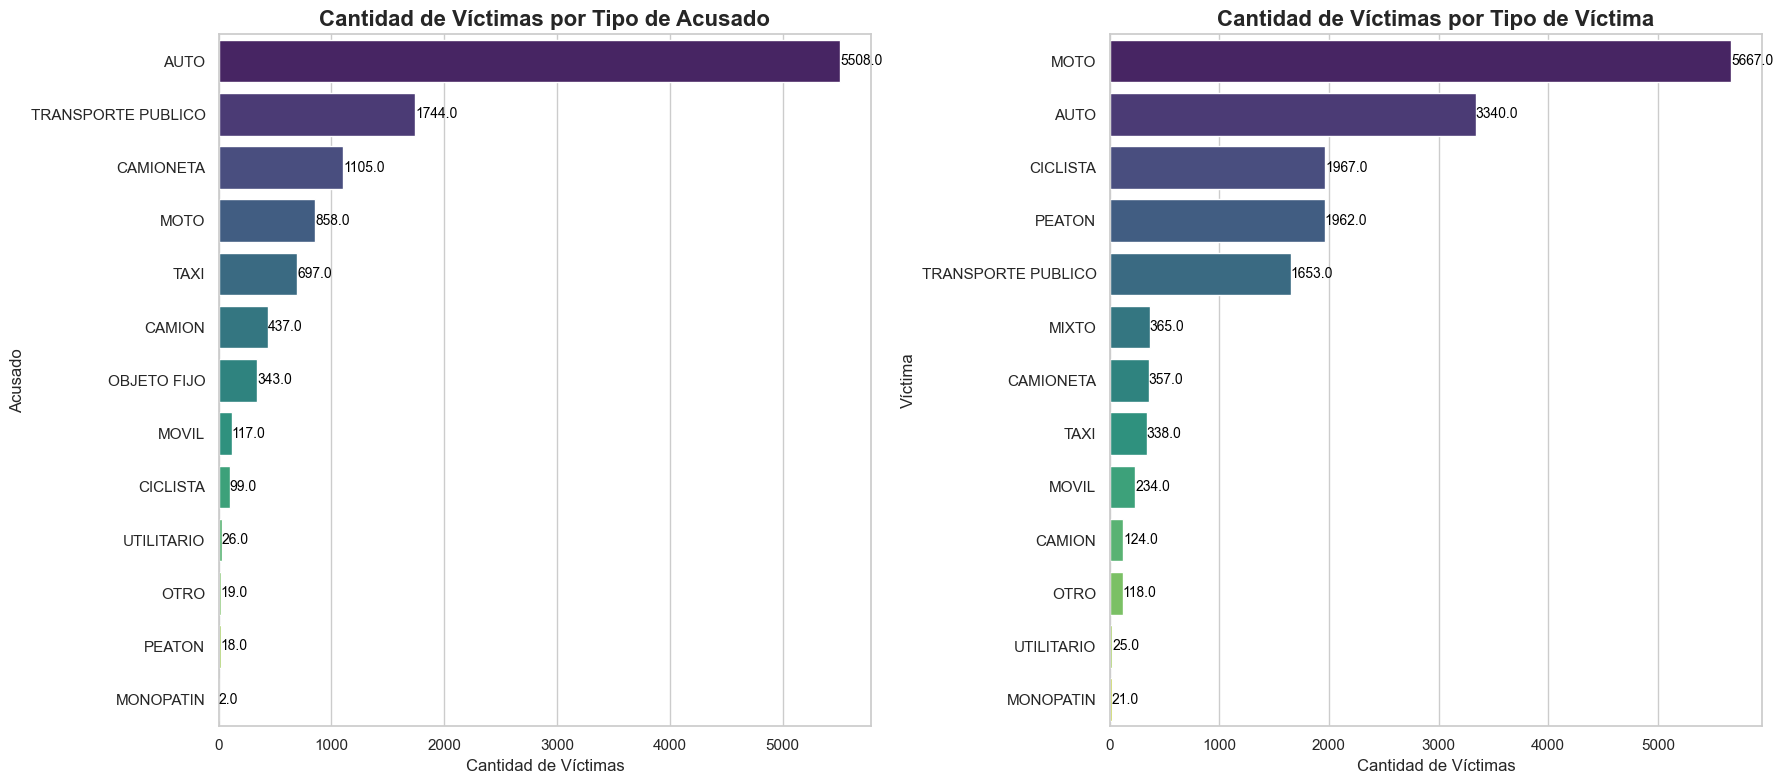

In [205]:
#Filtramos los valores "SD" en tipo de acusado y tipo de víctima
df_victimas_acusados_filtrado = df_lesiones[df_lesiones['Acusado'] != 'SD']
df_victimas_por_victima_filtrado = df_lesiones[df_lesiones['Víctima'] != 'SD']

#Filtramos las columnas necesarias para víctimas por acusado
df_victimas_acusados = df_victimas_acusados_filtrado[['Acusado', 'Cantidad_Víctimas']]
data_acusados = df_victimas_acusados.groupby('Acusado')['Cantidad_Víctimas'].sum().reset_index()
data_acusados = data_acusados.sort_values(by='Cantidad_Víctimas', ascending=False)

#Filtramos las columnas necesarias para víctimas por víctima
df_victimas_por_victima = df_victimas_por_victima_filtrado[['Víctima', 'Cantidad_Víctimas']]
data_victimas = df_victimas_por_victima.groupby('Víctima')['Cantidad_Víctimas'].sum().reset_index()
data_victimas = data_victimas.sort_values(by='Cantidad_Víctimas', ascending=False)

#Creamos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

#Graficamos las barras para víctimas por acusado
sns.barplot(x='Cantidad_Víctimas', y='Acusado', data=data_acusados, palette='viridis', ax=axes[0])
axes[0].set_title('Cantidad de Víctimas por Tipo de Acusado', fontsize=16, weight='bold')
axes[0].set_xlabel('Cantidad de Víctimas')
axes[0].set_ylabel('Acusado')
for index, value in enumerate(data_acusados['Cantidad_Víctimas']):
    axes[0].text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

#Graficamos las barras para víctimas por víctima
sns.barplot(x='Cantidad_Víctimas', y='Víctima', data=data_victimas, palette='viridis', ax=axes[1])
axes[1].set_title('Cantidad de Víctimas por Tipo de Víctima', fontsize=16, weight='bold')
axes[1].set_xlabel('Cantidad de Víctimas')
axes[1].set_ylabel('Víctima')
for index, value in enumerate(data_victimas['Cantidad_Víctimas']):
    axes[1].text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

#Ajustamos el diseño
plt.tight_layout()
plt.show()

**CONCLUSIONES:**

**1. Incidencia de lesiones por Tipo de Vehículo:**
El análisis resalta que los vehículos de transporte, especialmente "AUTO" y "TRANSPORTE PÚBLICO", son los principales implicados en lesiones por accidentes de tránsito. Esto subraya la necesidad de implementar medidas específicas para mejorar la seguridad vial asociada con estos tipos de vehículos, como campañas de concientización, controles de velocidad y regulaciones más estrictas. La prevalencia de lesiones relacionadas con estos vehículos podría estar vinculada a su mayor presencia en las vías, enfatizando la importancia de estrategias de seguridad que aborden la conducta de los conductores y las condiciones del tráfico

**2. Vulnerabilidad de las Víctimas:**
Se destaca que las víctimas de lesiones por accidentes de tránsito son principalmente "MOTO", "AUTO", "PEATON" y "CICLISTA". Este hallazgo subraya la vulnerabilidad inherente de estos grupos, donde los peatones carecen de protección y los conductores de motocicletas enfrentan un riesgo significativo debido a la falta de protección estructural. Las políticas de seguridad vial deben centrarse en medidas específicas para mejorar la protección de estos grupos, como zonas peatonales seguras, campañas de concientización sobre el uso del casco y otras prácticas seguras para los conductores de motocicletas.

**3. Consideraciones Adicionales:**
Aunque "AUTO" y "TRANSPORTE PÚBLICO" son responsables de un alto número de lesiones, es esencial analizar las circunstancias específicas que contribuyen a estos incidentes, como el exceso de velocidad, el estado del vehículo y las condiciones de la carretera. Este análisis detallado puede proporcionar información valiosa para desarrollar estrategias de prevención más efectivas. Además, la implementación de tecnologías de seguridad avanzadas en vehículos y la promoción de conductas seguras en la conducción pueden contribuir significativamente a reducir la incidencia de lesiones por accidentes de tránsito. La colaboración entre autoridades de tráfico, organizaciones de seguridad vial y la sociedad en general es esencial para abordar estos desafíos de manera integral.

**10. ¿Cuales son los zonas de ocurren la mayor cantidad de lesiones por accidentes de tránsito?**

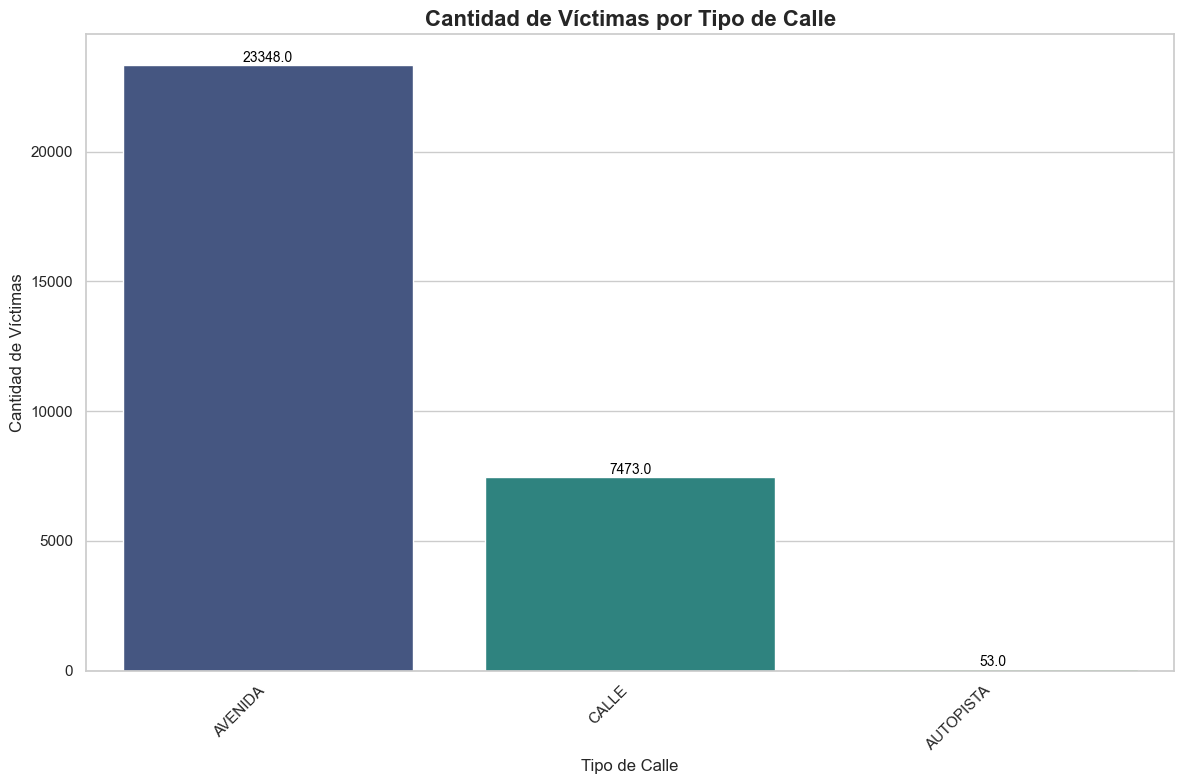

In [207]:
#Filtramos los valores "SD" en tipo de calle
df_victimas_por_calle_filtrado = df_lesiones[df_lesiones['Tipo_Calle'] != 'SD']

#Filtramos las columnas necesarias
df_victimas_por_calle = df_victimas_por_calle_filtrado[['Tipo_Calle', 'Cantidad_Víctimas']]

#Agrupamos por tipo de calle y sumar la cantidad de víctimas
data = df_victimas_por_calle.groupby('Tipo_Calle')['Cantidad_Víctimas'].sum().reset_index()

#Ordenamos los datos por la cantidad de víctimas en orden descendente
data = data.sort_values(by='Cantidad_Víctimas', ascending=False)

#Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tipo_Calle', y='Cantidad_Víctimas', data=data, palette='viridis')

#Configuración del gráfico
ax.set_title('Cantidad de Víctimas por Tipo de Calle', fontsize=16, weight='bold')
ax.set_xlabel('Tipo de Calle')
ax.set_ylabel('Cantidad de Víctimas')

#Añadimos etiquetas con el número de víctimas encima de cada barra
for index, value in enumerate(data['Cantidad_Víctimas']):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

#Rotamos los labels del eje x en 45 grados para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [211]:
import folium
from folium.plugins import HeatMap

#Filtramos las columnas necesarias
df_mapa = df_lesiones[['Pos Y', 'Pos X', 'Cantidad_Víctimas']]

#Eliminamos filas con valores nulos en las columnas de posición
df_mapa = df_mapa.dropna(subset=['Pos X', 'Pos Y'])

#Creamos un mapa centrado en la ubicación media de los homicidios
mapa = folium.Map(location=[df_mapa['Pos Y'].mean(), df_mapa['Pos X'].mean()], zoom_start=12, control_scale=True)

#Cargamos el GeoJSON como base del mapa
geojson_file = 'Dataset/ba_map.json'
folium.GeoJson(geojson_file).add_to(mapa)

#Creamos un mapa de calor con la cantidad de víctimas
heat_data = [[row['Pos Y'], row['Pos X'], row['Cantidad_Víctimas']] for index, row in df_mapa.iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=13).add_to(mapa)

#Configuramos la leyenda en función de los colores del mapa de calor
min_value = df_mapa['Cantidad_Víctimas'].min()
max_value = df_mapa['Cantidad_Víctimas'].max()

legend_html = f'''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 200px; height: 90px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">
     &nbsp; <b> Leyenda </b> <br>
     &nbsp; <span style="background-color: #0000ff; padding: 5px;"> </span> &nbsp; Menos {min_value} víctimas <br>
     &nbsp; <span style="background-color: #00ff00; padding: 5px;"> </span> &nbsp; Entre {min_value + 1} y {max_value // 2} víctimas <br>
     &nbsp; <span style="background-color: #ff0000; padding: 5px;"> </span> &nbsp; Más de {max_value // 2} víctimas <br>
     </div>
     '''

mapa.get_root().html.add_child(folium.Element(legend_html))

#Configuramos el mapa
mapa.save('mapa_homicidios_con_geojson.html')
mapa

**CONCLUSIONES:**
La análisis revela que la mayoría de lesiones relacionados con accidentes de tránsito se concentran en las avenidas, evidenciando una serie de factores que contribuyen a esta tendencia.

**1. Tráfico Intenso y Velocidades Elevadas:**
Las avenidas suelen caracterizarse por un tráfico más denso y velocidades más elevadas, factores que aumentan el riesgo de accidentes de tránsito. La combinación de vehículos en movimiento a altas velocidades puede contribuir a situaciones más propensas a incidentes mortales.

**2. Intersecciones y Cruces Peligrosos:**
Las avenidas suelen tener numerosas intersecciones y cruces, puntos críticos donde pueden ocurrir colisiones y accidentes. La complejidad de estos puntos de encuentro puede aumentar la probabilidad de situaciones peligrosas, especialmente si no hay una adecuada señalización o control del tráfico.

**11. ¿Cuales son las sentencias o etiqueta policial que pueden tener los culpables dependiendo a la gravedad de las lesiones por accidentes de tránsito?**

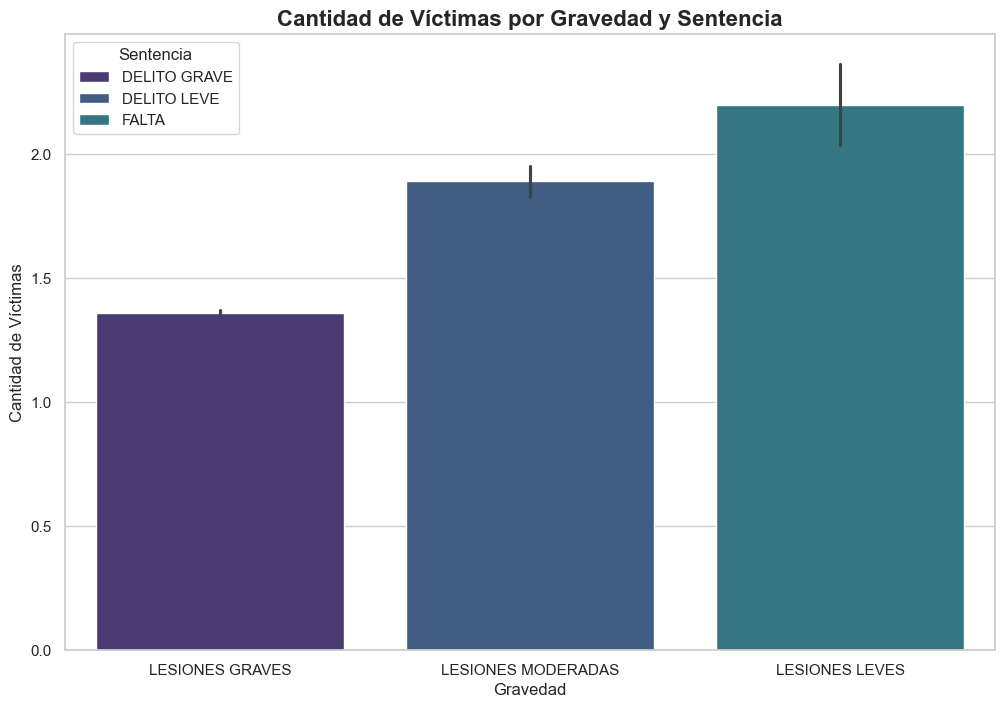

In [218]:
#Filtramos las columnas necesarias
df_gravedad_sentencia = df_lesiones[['Gravedad', 'Sentencia', 'Cantidad_Víctimas']]

#Creamos el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.set_palette("viridis")  # Puedes cambiar la paleta de colores según tus preferencias

#Utilizamos seaborn para dibujar un gráfico de barras agrupadas
sns.barplot(data=df_gravedad_sentencia, x='Gravedad', y='Cantidad_Víctimas', hue='Sentencia')

#Configuración del gráfico
plt.title('Cantidad de Víctimas por Gravedad y Sentencia', fontsize=16, weight='bold')
plt.xlabel('Gravedad')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sentencia')

#Mostramos el gráfico
plt.show()

**CONCLUSIONES:**
Las conclusiones extraídas revelan la significativa relación entre la gravedad de las lesiones sufridas por las víctimas y las sentencias dictaminadas por el sistema judicial. Estas observaciones cobran importancia al considerar la aplicación del código penal de cada país, donde la tipificación de las lesiones y su correspondiente sanción legal juegan un papel crucial. Este análisis proporciona insights valiosos sobre cómo el sistema legal responde a diversos niveles de gravedad en los incidentes, contribuyendo así a una comprensión más profunda de la relación entre la justicia y los actos lesivos en el contexto vial.